In [1]:
!pip install fastai

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [3]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [4]:
!ls -l /root/.fastai/data/oxford-iiit-pet/images/ | head -n 10

total 792644
-rwxr-xr-x 1 1000 1000  126923 Jun 18  2012 Abyssinian_100.jpg
-rw-r--r-- 1 1000 1000 1351002 Jun 18  2012 Abyssinian_100.mat
-rwxr-xr-x 1 1000 1000   49023 Jun 18  2012 Abyssinian_101.jpg
-rw-r--r-- 1 1000 1000  956090 Jun 18  2012 Abyssinian_101.mat
-rwxr-xr-x 1 1000 1000  165505 Jun 18  2012 Abyssinian_102.jpg
-rw-r--r-- 1 1000 1000 1611487 Jun 18  2012 Abyssinian_102.mat
-rwxr-xr-x 1 1000 1000  132937 Jun 18  2012 Abyssinian_103.jpg
-rwxr-xr-x 1 1000 1000   34907 Jun 18  2012 Abyssinian_104.jpg
-rwxr-xr-x 1 1000 1000  141823 Jun 18  2012 Abyssinian_105.jpg


In [5]:
def is_cat(x):
  #print(x)
  return x[0].isupper()


In [7]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.fine_tune(2)

In [ ]:
learn.fine_tune(5)


```
cnn_learner(
    data:DataBunch, # 传入的数据包
    base_arch:Callable, # 要进行Finetune的主干网络
    cut:Union[int, Callable]=None, # 在哪一层切割网络
    pretrained:bool=True, # 是否使用预训练的模型
    lin_ftrs:Optional[Collection[int]]=None, # 添加的头部子网络中的线性层的特征数目。
    ps:Floats=0.5, # 添加的头部子网络中的dropout层的丢弃概率
    custom_head:Optional[Module]=None, # 自定义的头部子网络
    split_on:Union[Callable, Collection[ModuleList], NoneType]=None,
    bn_final:bool=False, # 在分类之前是否添加Batch Normalization层
    init='kaiming_normal_', # 添加的头部子网络的初始化方法
    concat_pool:bool=True,
    **kwargs:Any) → Learner
```




In [ ]:
# let's try another arch.
dls2 = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls2, resnet50, metrics=error_rate)
learn.fine_tune(5)

In [ ]:
# let's try another arch.
dls3 = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls3, resnet101, metrics=error_rate)
learn.fine_tune(5)

In [8]:
path= untar_data(URLs.CAMVID_TINY)

# Train car images.

In [10]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/'images'),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)

)

In [11]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 211MB/s]


epoch,train_loss,valid_loss,time
0,2.794016,2.301942,00:08


epoch,train_loss,valid_loss,time
0,1.906389,1.536786,00:01
1,1.642026,1.220888,00:01
2,1.506348,1.216511,00:02
3,1.392281,1.051504,00:01
4,1.269387,0.884804,00:01
5,1.148983,0.781310,00:01
6,1.046425,0.748501,00:01
7,0.965502,0.742742,00:01


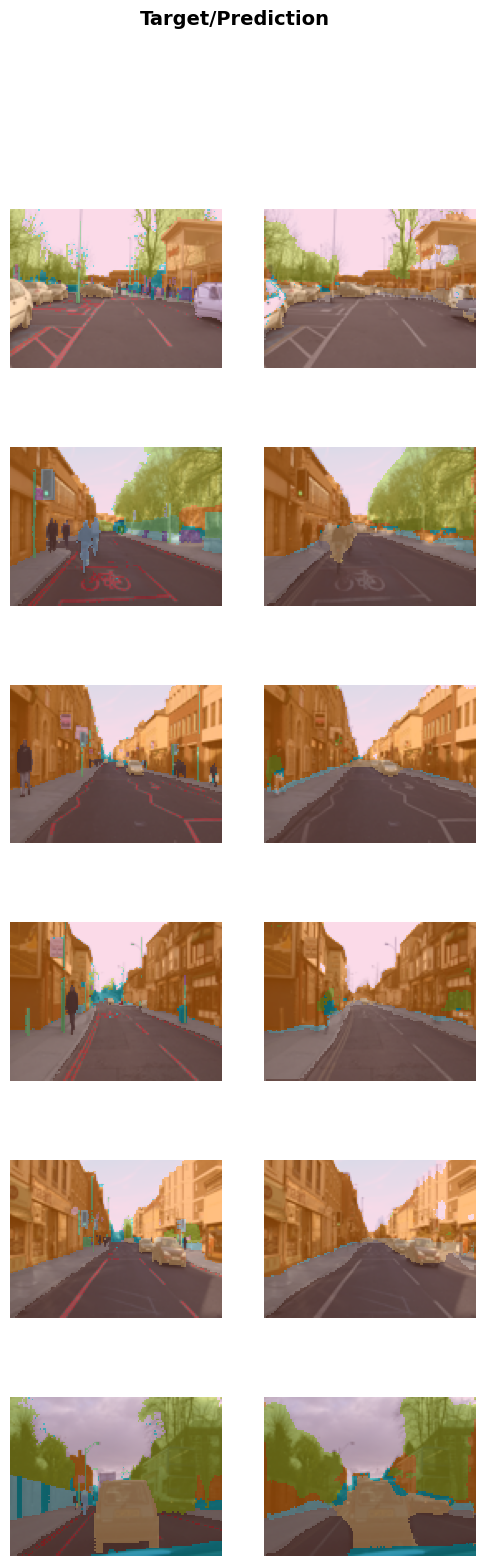

In [13]:
learn.show_results(max_n=6)

In [14]:
# NLP


In [15]:
from fastai.text.all import *


In [17]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [18]:
rn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [19]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,time
0,3.342276,8.238345,00:02


epoch,train_loss,valid_loss,time
0,2.695058,1.801560,00:02
1,4.663317,2.124581,00:01
2,3.530739,1.488739,00:01
3,2.842431,1.375195,00:01
